# Advanced CNN Architecture

## Weather Classification

## 1.Tải bộ dữ liệu

In [32]:
# bộ dữ liệu img_cls_weather_dataset.zip
# https://drive.google.com/file/d/1fnJMMw0LvDgl-GS4FTou5qAgLxOE2KQ0/view?usp=drive_link
%cd /content/drive/MyDrive/Colab Notebooks/MODULE06/W02
# !gdow 1fnJMMw0LvDgl-GS4FTou5qAgLxOE2KQ0

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Colab Notebooks/MODULE06/W02'
g:\AIO\EXERCISE\AIO-2024\MODULE06\WEEK02


## 2.Import các thư viện cần thiết

In [33]:
import torch
import torch.nn as nn
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

## 3.Cố định giá trị ngẫu nhiên
Để có thể tái tạo lại cùng một kết quả mô hình, chúng ta sẽ cố định cùng một giá trị ngẫu nhiên (seed) cho các thư viện có chứa các hàm tạo giá trị ngẫu nhiên

In [34]:
def set_seed(seed):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

seed = 59
set_seed(seed)

## 4.Đọc dữ liệu
Để thuận tiện trong việc xây dựng PyTorch datasets, chúng ta sẽ ghi nhận thông tin về các classes, đường dẫn đến tất cả các ảnh cũng như label tương ứng như sau. Nhận thấy tên của các folder con trong thư mục weather-dataset/dataset cũng là tên class. Vì vậy, chúng ta sẽ đọc tên các folder này và đưa vào một dictionary

In [35]:
%pwd

'g:\\AIO\\EXERCISE\\AIO-2024\\MODULE06\\WEEK02'

In [36]:
root_dir = 'Data/weather-dataset/dataset'
img_paths = []
labels = []
classes = {label_idx:class_name for label_idx, class_name in enumerate(sorted(os.listdir(root_dir))) }

In [37]:
classes.keys(), classes.values()

(dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
 dict_values(['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']))

In [38]:
classes

{0: 'dew',
 1: 'fogsmog',
 2: 'frost',
 3: 'glaze',
 4: 'hail',
 5: 'lightning',
 6: 'rain',
 7: 'rainbow',
 8: 'rime',
 9: 'sandstorm',
 10: 'snow'}

In [39]:
# Đọc toàn bộ đường dẫn của các ảnh trong bộ dữ liệu cũng như label tương ứng
img_paths = []
labels = []
for label_idx, class_name in classes.items():
  class_dir = os.path.join(root_dir, class_name)
  for img_filename in os.listdir(class_dir):
    img_path = os.path.join(class_dir, img_filename)
    img_paths.append(img_path)
    labels.append(label_idx)

In [40]:
len(img_paths)

6862

In [41]:
img_paths

['Data/weather-dataset/dataset\\dew\\2208.jpg',
 'Data/weather-dataset/dataset\\dew\\2209.jpg',
 'Data/weather-dataset/dataset\\dew\\2210.jpg',
 'Data/weather-dataset/dataset\\dew\\2211.jpg',
 'Data/weather-dataset/dataset\\dew\\2212.jpg',
 'Data/weather-dataset/dataset\\dew\\2213.jpg',
 'Data/weather-dataset/dataset\\dew\\2214.jpg',
 'Data/weather-dataset/dataset\\dew\\2215.jpg',
 'Data/weather-dataset/dataset\\dew\\2216.jpg',
 'Data/weather-dataset/dataset\\dew\\2217.jpg',
 'Data/weather-dataset/dataset\\dew\\2218.jpg',
 'Data/weather-dataset/dataset\\dew\\2219.jpg',
 'Data/weather-dataset/dataset\\dew\\2220.jpg',
 'Data/weather-dataset/dataset\\dew\\2221.jpg',
 'Data/weather-dataset/dataset\\dew\\2222.jpg',
 'Data/weather-dataset/dataset\\dew\\2223.jpg',
 'Data/weather-dataset/dataset\\dew\\2224.jpg',
 'Data/weather-dataset/dataset\\dew\\2225.jpg',
 'Data/weather-dataset/dataset\\dew\\2226.jpg',
 'Data/weather-dataset/dataset\\dew\\2227.jpg',
 'Data/weather-dataset/dataset\\dew\\222

## 5.Chia bộ dữ liệu train, val, test
Với danh sách đường dẫn ảnh và label, chúng ta sẽ chia thành ba bộ dữ liệu train, val, test sử dụng hàm train_test_split() của thư viện scikit-learn

In [42]:
val_size = 0.2
test_size = 0.125
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(img_paths
                                                  ,labels
                                                  ,test_size=val_size
                                                  ,random_state=seed
                                                  ,shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train
                                                    ,y_train
                                                    ,test_size=test_size
                                                    ,random_state=seed
                                                    ,shuffle=is_shuffle)

In [43]:
len(X_train), len(X_val), len(X_test)

(4802, 1373, 687)

In [44]:
X_train

['Data/weather-dataset/dataset\\hail\\0020.jpg',
 'Data/weather-dataset/dataset\\fogsmog\\4460.jpg',
 'Data/weather-dataset/dataset\\glaze\\6425.jpg',
 'Data/weather-dataset/dataset\\rime\\5639.jpg',
 'Data/weather-dataset/dataset\\fogsmog\\4116.jpg',
 'Data/weather-dataset/dataset\\dew\\2509.jpg',
 'Data/weather-dataset/dataset\\frost\\3640.png',
 'Data/weather-dataset/dataset\\dew\\2374.jpg',
 'Data/weather-dataset/dataset\\fogsmog\\4490.jpg',
 'Data/weather-dataset/dataset\\rime\\5351.jpg',
 'Data/weather-dataset/dataset\\dew\\2807.jpg',
 'Data/weather-dataset/dataset\\rime\\5307.jpg',
 'Data/weather-dataset/dataset\\rain\\141.jpg',
 'Data/weather-dataset/dataset\\fogsmog\\4810.jpg',
 'Data/weather-dataset/dataset\\snow\\1423.jpg',
 'Data/weather-dataset/dataset\\sandstorm\\3082.jpg',
 'Data/weather-dataset/dataset\\lightning\\2008.jpg',
 'Data/weather-dataset/dataset\\rime\\5682.jpg',
 'Data/weather-dataset/dataset\\rainbow\\0714.jpg',
 'Data/weather-dataset/dataset\\hail\\0193.jpg

## 6.Xây dựng class pytorch datasets
Xây dựng class datasets cho bộ dữ liệu weather

In [45]:
class WeatherDataset(Dataset):
  def __init__(self, X, y,transform = None):
    self.transform = transform
    self.img_paths = X
    self.labels = y

  def __len__(self):
    return len(self.img_paths)

  def __getitem__(self, idx):
    img_path = self.img_paths[idx]
    img = Image.open(img_path).convert("RGB")

    if self.transform:
      img = self.transform(img)

    return img, self.labels[idx]

## 7.Xây dựng hàm tiền xử lý ảnh (transform)
Để đảm bảo dữ liệu ảnh đầu vào được đồng bộ về kích thước và giá trị, chúng ta tự định nghĩa hàm transform để tiền xử lý ảnh đầu vào như sau (không sử dụng thư viện torchvision.transforms). Các kỹ thuật được áp dụng: resize ảnh, đổi về tensor và chuẩn hóa giá trị pixel về khoảng (0, 1)

In [46]:
def transform (img, img_size =(224, 224)):
  img = img.resize(img_size)
  img = np.array(img)[... , :3]
  img = torch.tensor(img).permute(2, 0, 1).float()
  normalized_img = img/255.0

  return normalized_img

## 8.Khai báo datasets object cho ba bộ train, val, test
Với class WeatherDataset và hàm chuẩn hóa ảnh, ta tạo ba object datasets tương ứng như sau

In [47]:
train_dataset = WeatherDataset(X_train, y_train,transform=transform)
val_dataset = WeatherDataset(X_val, y_val,transform=transform)
test_dataset = WeatherDataset(X_test, y_test,transform=transform)

In [48]:
len(train_dataset), len(val_dataset), len(test_dataset)

(4802, 1373, 687)

## 9.Khai báo dataloader
Với ba object datasets trên, ta khai báo giá trị batch size và
tạo dataloader như sau

In [49]:
train_batch_size = 512
test_batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=test_batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

In [50]:
train_loader

## 10.Xây dựng model
xây dựng class cho model deep learning với kiến trúc ResNet.

In [51]:
#xây dựng class Residual Block, đây là một thành phần đặc biệt của kiến trúc ResNet so với các mạng CNNs khác
class ResidualBlock(nn.Module):
  def __init__(self, in_channels, out_channels, stride=1):
    super(ResidualBlock, self).__init__()
    self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
    self.batch_norm1 = nn.BatchNorm2d(out_channels)
    self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
    self.batch_norm2 = nn.BatchNorm2d(out_channels)
    self.downsample = nn.Sequential()

    if stride != 1 or in_channels != out_channels:
      self.downsample = nn.Sequential(nn.Conv2d(in_channels
                                                ,out_channels
                                                ,kernel_size=1
                                                ,stride=stride)
                                      ,nn.BatchNorm2d(out_channels))
    self.relu = nn.ReLU()

  def forward(self, x):
    shortcut = x.clone()
    x = self.conv1(x)
    x = self.batch_norm1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.batch_norm2(x)
    x += self.downsample(shortcut)
    x = self.relu(x)

    return x

In [52]:
#Với ResidualBlock, ta triển khai toàn bộ kiến trúc ResNet
class ResNet(nn.Module):
  def __init__(self, residual_block, n_blocks_lst, n_classes):
    super(ResNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
    self.batch_norm1 = nn.BatchNorm2d(64)
    self.relu = nn.ReLU()
    self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    self.conv2 = self.create_layer(residual_block, 64, 64, n_blocks_lst[0], 1)
    self.conv3 = self.create_layer(residual_block, 64, 128, n_blocks_lst[1], 2)
    self.conv4 = self.create_layer(residual_block, 128, 256, n_blocks_lst[2], 2)
    self.conv5 = self.create_layer(residual_block, 256, 512, n_blocks_lst[3], 2)
    self.avgpool = nn.AdaptiveAvgPool2d(1)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(512, n_classes)

  def create_layer(self, residual_block, in_channels, out_channels, n_blocks, stride):
    blocks = []
    first_block = residual_block(in_channels, out_channels, stride)
    blocks.append(first_block)

    for idx in range(1, n_blocks):
      block = residual_block(out_channels, out_channels, stride)
      blocks.append(block)

    block_sequential = nn.Sequential(*blocks)
    return block_sequential

  def forward(self, x):
    x = self.conv1(x)
    x = self.batch_norm1(x)
    x = self.maxpool(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = self.conv5(x)
    x = self.avgpool(x)
    x = self.flatten(x)
    x = self.fc1(x)
    return x

In [53]:
#khai báo model ResNet
n_classes = len(list(classes.keys()))
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = ResNet(residual_block=ResidualBlock
               ,n_blocks_lst=[2, 2, 2, 2]
               ,n_classes=n_classes).to(device)

In [54]:
device

'cpu'

In [55]:
n_classes

11

## 11.Xây dựng hàm đánh giá model
Xây dựng hàm đánh giá model với đầu vào là model, bộ dữ liệu đánh giá và hàm loss. Hàm này sẽ trả về giá trị loss và accuracy của model trên tập dữ liệu đầu vào

In [56]:
def evaluate(model, dataloader, criterion, device):
  model.eval()
  correct = 0
  total = 0
  losses = []
  with torch.no_grad():
    for inputs, labels in dataloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      losses.append(loss.item())
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      loss = sum(losses)/len(losses)
      acc = correct/total
  return loss, acc

## 12.Xây dựng hàm huấn luyện model

In [57]:
def fit(model, train_loader, val_loader, criterion, optimizer, device, epochs):
  train_losses = []
  val_losses = []
  for epoch in range(epochs):
    batch_train_losses = []

    model.train()
    for idx, (inputs, labels) in enumerate(train_loader):
      inputs, labels = inputs.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      batch_train_losses.append(loss.item())

    train_loss = sum(batch_train_losses)/len(batch_train_losses)
    train_losses.append(train_loss)

    val_loss, val_acc = evaluate(model, val_loader, criterion, device)
    val_losses.append(val_loss)

    print (f'EPOCH{epoch+1}:\tTrain loss:{train_loss:.4f}\tVal loss:{val_loss:.4f}')

  return train_losses , val_losses

## 13.Khai báo hàm loss và thuật toán tối ưu hóa
Với bài toán phân loại ảnh, ta sử dụng hàm loss CrossEntropyLoss và thuật toán tối ưu hóa Stochastic Gradient Descent (SGD).

Ngoài ra, ta cũng khai báo giá trị learning rate và số epochs

In [58]:
lr = 1e-2
epochs = 25
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

## 14.Thực hiện huấn luyện
Với tất cả các tham số đầu vào đã sẵn sàng, ta gọi hàm fit() để bắt đầu quá trình huấn luyện mô hình ResNet

In [59]:
train_losses, val_losses = fit(model, train_loader, val_loader, criterion, optimizer, device, epochs)

## 15.Đánh giá mô hình
Ta gọi hàm evaluate() để đánh giá performance của model trên hai tập val và test

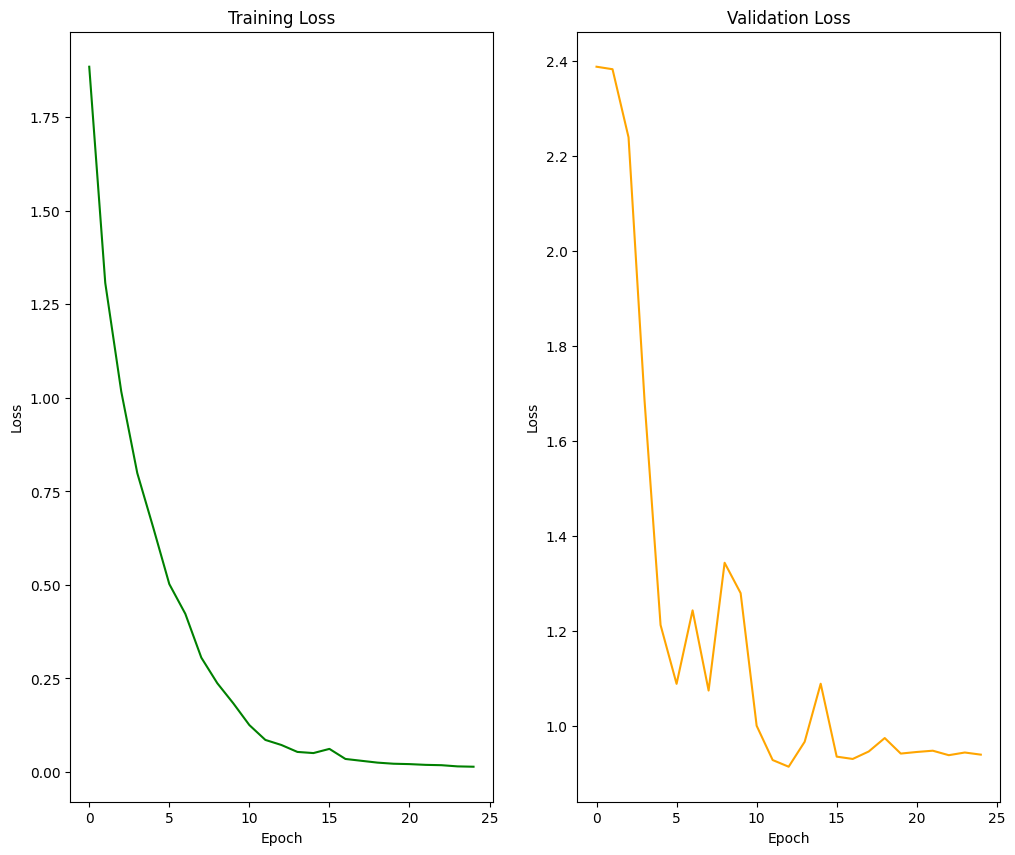

In [ ]:
#  trực quan kết quả huấn luyện trên tập train và val cho bài toán nonlinear data classification
fig , ax = plt.subplots(1, 2, figsize=(12, 10))

ax[0].plot(train_losses, color='green')
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].set_title('Training Loss')

ax [1].plot(val_losses, color='orange')
ax [1].set(xlabel='Epoch', ylabel='Loss')
ax [1].set_title('Validation Loss')


plt.show()

In [ ]:
val_loss, val_acc = evaluate(model, val_loader, criterion, device)
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print('Evaluation on val/ test dataset')
print('Val accuracy:', val_acc)
print('Test accuracy:', test_acc)

Evaluation on val/ test dataset
Val accuracy: 0.705753823743627
Test accuracy: 0.7117903930131004
